In [5]:
import numpy as np
import matplotlib.pyplot as plt

image_file = '../data/raw/pannuke/Fold 1/images/fold1/images.npy'
mask_file = '../data/raw/pannuke/Fold 1/masks/fold1/masks.npy'

images = np.load(image_file)
masks = np.load(mask_file)

In [6]:
types_path = '../data/raw/pannuke/Fold 1/images/fold1/types.npy' 
types = np.load(types_path)

print(f"Types shape: {types.shape}")
print(f"Unique types: {np.unique(types)}")

Types shape: (2656,)
Unique types: ['Adrenal_gland' 'Bile-duct' 'Bladder' 'Breast' 'Cervix' 'Colon'
 'Esophagus' 'HeadNeck' 'Kidney' 'Liver' 'Lung' 'Ovarian' 'Pancreatic'
 'Prostate' 'Skin' 'Stomach' 'Testis' 'Thyroid' 'Uterus']


In [7]:
single_masks = masks[:, :, :, -1]
single_masks = np.expand_dims(single_masks, axis=-1)
single_masks.shape

(2656, 256, 256, 1)

In [3]:
#np.save('single_mask.npy', single_masks)

In [5]:
#types_file = '../data/raw/pannuke/Fold 1/images/fold1/types.npy'
#types = np.load(types_file)
#colon_indices = np.where(np.logical_or(types == 'Colon', types == 'Stomach', types == 'Esophagus'))[0]

# Convert to list if needed
#colon_indices_list = colon_indices.tolist()

#single_masks = single_masks[colon_indices_list]
#images = images[colon_indices_list]

In [8]:
# Filter out masks where all values are 1
non_all_zeroes_indices = [i for i, mask in enumerate(single_masks) if not (np.all(mask == 0))]

# Filter the images and masks using these indices
images = images[non_all_zeroes_indices]
single_masks = single_masks[non_all_zeroes_indices]

print(f"Filtered number of images (0s): {len(images)}")
print(f"# of masks after filtering (0s): {len(single_masks)}")

Filtered number of images (0s): 2620
# of masks after filtering (0s): 2620


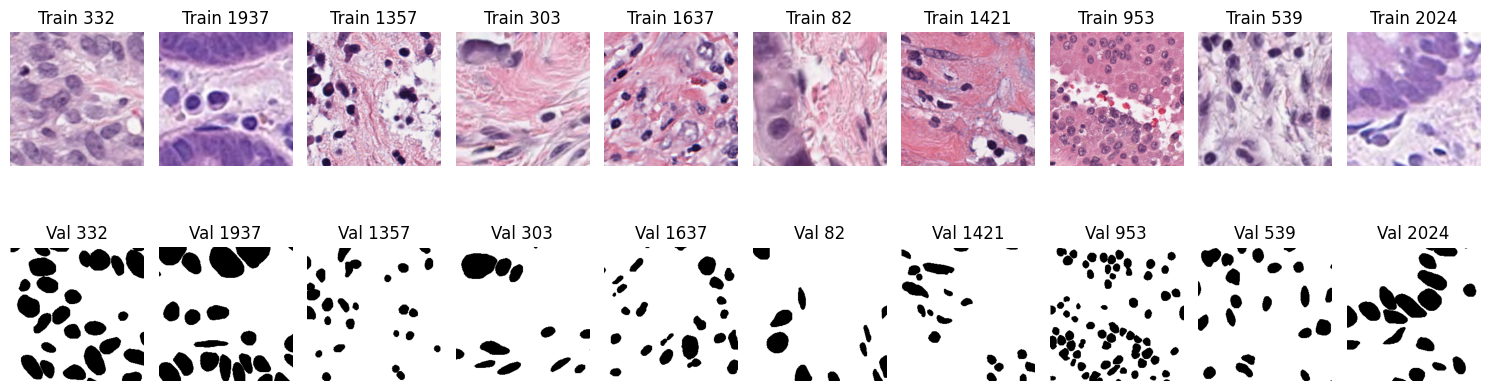

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_random_samples(X_train, Y_train, num_samples=10):
    # Generate random indices
    random_indices = np.random.choice(len(X_train), num_samples, replace=False)

    fig, axes = plt.subplots(2, num_samples, figsize=(15, 5))

    # Plot random samples from X_train
    for i, idx in enumerate(random_indices):
        ax = axes[0, i]
        ax.imshow(X_train[idx].astype(int), cmap='gray')  # Assuming grayscale images, adjust cmap for RGB
        ax.set_title(f"Train {idx}")
        ax.axis('off')

    # Plot random samples from Y_train
    for i, idx in enumerate(random_indices):
        ax = axes[1, i]
        ax.imshow(Y_train[idx], cmap='gray')  # Assuming grayscale images, adjust cmap for RGB
        ax.set_title(f"Val {idx}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_random_samples(images, single_masks)


In [10]:
import sys
sys.path.append('../utils')
import os
import image_cropp_utils

from image_cropp_utils import read_image

dir_base = '/Users/lollijagladiseva/Desktop/cellseg_visium_hd/data/processed/'
filename = 'p5_cropped_image_overlap_comparison.btf'
img = read_image(dir_base + filename)

In [11]:
import staintools
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from staintools.miscellaneous.exceptions import TissueMaskException

def load_and_preprocess_image(image):
    image = staintools.LuminosityStandardizer.standardize(image.astype(np.uint8))
    return image

# Load and preprocess images
images = images.astype(np.uint8)

images_normalized = np.zeros_like(images)
# Ensure the images are properly scaled and normalized
for i in range(len(images)):
    images_normalized[i] = staintools.LuminosityStandardizer.standardize(images[i])

# Instantiate and fit the Macenko normalizer
normalizer = staintools.StainNormalizer(method='macenko')

target_image = img.astype(np.uint8)
normalizer.fit(target_image)

# Normalize each image and save back to the array
for i in range(len(images_normalized)):
    try:
        normalized_image = normalizer.transform(images[i])
        images_normalized[i] = normalized_image
    except TissueMaskException:
        print(f"Tissue mask empty for image {i}, skipping normalization.")

# Save the normalized images as .npy
normalized_images_file = '../data/raw/pannuke/Fold 1/images/fold1/images_macenko.npy'
np.save(normalized_images_file, images_normalized)


Tissue mask empty for image 1923, skipping normalization.
Tissue mask empty for image 1924, skipping normalization.
Tissue mask empty for image 1930, skipping normalization.
Tissue mask empty for image 1979, skipping normalization.
Tissue mask empty for image 1990, skipping normalization.
Tissue mask empty for image 1992, skipping normalization.


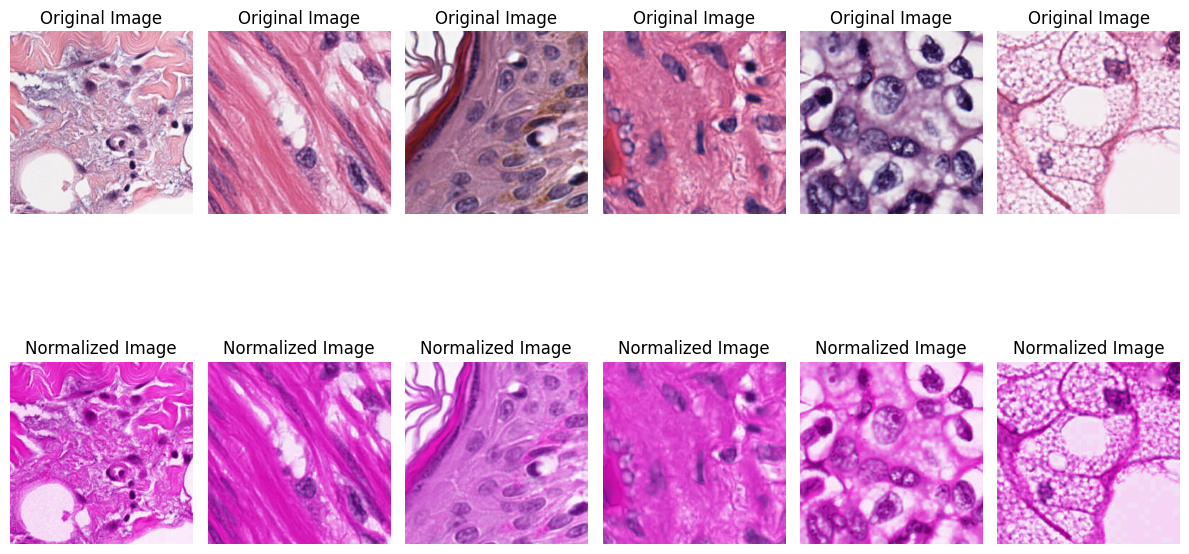

In [12]:

# Plot random 6 images before and after normalization
images_macenko = np.load(normalized_images_file)

# Select 6 random indices
random_indices = np.random.choice(len(images), 6, replace=False)

plt.figure(figsize=(12, 8))
for idx, i in enumerate(random_indices):
    plt.subplot(2, 6, idx + 1)
    plt.imshow(images[i])
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 6, idx + 7)
    plt.imshow(images_macenko[i])
    plt.title('Normalized Image')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [13]:
# Assuming images_macenko is a list of images
images_macenko = [np.array(img) for img in images_macenko]  # Ensure all items are numpy arrays

# Convert the list of images to a NumPy array
images_macenko_array = np.array(images_macenko)

# Alternatively, if images are of the same shape and you want to stack them along a new dimension
images_macenko_array = np.stack(images_macenko, axis=0)

# Print the shape of the resulting NumPy array
print(f"Shape of images_macenko_array: {images_macenko_array.shape}")

Shape of images_macenko_array: (2620, 256, 256, 3)


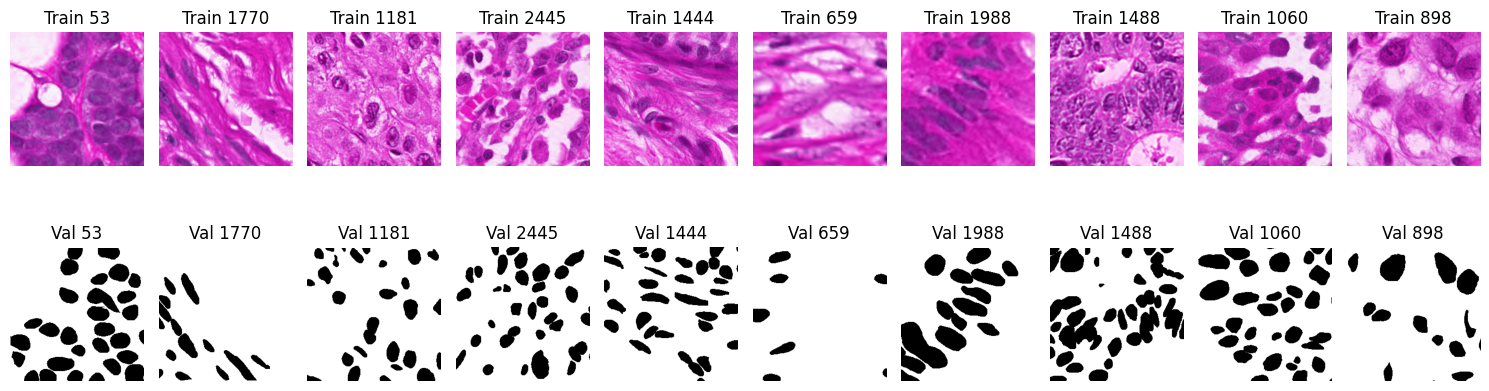

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_random_samples(X_train, Y_train, num_samples=10):
    # Generate random indices
    random_indices = np.random.choice(len(X_train), num_samples, replace=False)

    fig, axes = plt.subplots(2, num_samples, figsize=(15, 5))

    # Plot random samples from X_train
    for i, idx in enumerate(random_indices):
        ax = axes[0, i]
        ax.imshow(X_train[idx].astype(int), cmap='gray')  # Assuming grayscale images, adjust cmap for RGB
        ax.set_title(f"Train {idx}")
        ax.axis('off')

    # Plot random samples from Y_train
    for i, idx in enumerate(random_indices):
        ax = axes[1, i]
        ax.imshow(Y_train[idx], cmap='gray')  # Assuming grayscale images, adjust cmap for RGB
        ax.set_title(f"Val {idx}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_random_samples(images_macenko_array, single_masks)


In [15]:
images_macenko_array.shape

(2620, 256, 256, 3)

In [37]:
from sklearn.model_selection import train_test_split
images_macenko_array = images_macenko_array / 255.0
X_train, X_val, Y_train, Y_val = train_test_split(images_macenko_array[:2500], single_masks[:2500], test_size=0.2, random_state=40)

In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import os

def unet_model(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)

    # Encoder
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottleneck
    conv5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)

    # Decoder
    up6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5)
    merge6 = layers.concatenate([conv4, up6], axis=3)
    conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(merge6)
    conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)

    up7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(merge7)
    conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

    up8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(merge8)
    conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

    up9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(merge9)
    conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = models.Model(inputs=inputs, outputs=conv10)

    return model


2024-07-24 09:35:43.539644: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [39]:
model = unet_model()

In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 32, 32,    │  2,097,664 │ conv2d_9[0][0]    │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ conv2d_7[0][0], 

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.save('../data/processed/pannuke/colon_and_stomach_5e_Mstain_01_filtered.h5')

In [19]:
import cv2

# Original MPP and target MPP
original_mpp = 0.27369340955762717
target_mpp = 0.5

# Calculate the scaling factor
scaling_factor = original_mpp / target_mpp

# Get the new dimensions
new_dimensions = (
    int(img.shape[1] * scaling_factor), 
    int(img.shape[0] * scaling_factor)
)

# Resample the image
resampled_image = cv2.resize(img, new_dimensions, interpolation=cv2.INTER_LINEAR)

# Save or use the resampled image
cv2.imwrite('resampled_image_visium_hd.jpg', resampled_image)


True

In [98]:
# new version of extracting + normalization + stitching + no resize
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

def extract_patches(image, patch_size=(256, 256), overlap=0.5):
    patches = []
    stride = int(patch_size[0] * (1 - overlap))
    image_height, image_width = image.shape[:2]

    for y in range(0, image_height - patch_size[0] + 1, stride):
        for x in range(0, image_width - patch_size[1] + 1, stride):
            patch = image[y:y + patch_size[0], x:x + patch_size[1]]
            patches.append((patch, (x, y)))

    # Handle edge cases
    for y in range(0, image_height - patch_size[0] + 1, stride):
        patch = image[y:y + patch_size[0], image_width - patch_size[1]:image_width]
        patches.append((patch, (image_width - patch_size[1], y)))

    for x in range(0, image_width - patch_size[1] + 1, stride):
        patch = image[image_height - patch_size[0]:image_height, x:x + patch_size[1]]
        patches.append((patch, (x, image_height - patch_size[0])))

    # Bottom-right corner
    patch = image[image_height - patch_size[0]:image_height, image_width - patch_size[1]:image_width]
    patches.append((patch, (image_width - patch_size[1], image_height - patch_size[0])))

    return patches

def plot_patch_vs_mask(original_patch, predicted_mask_patch):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original_patch)
    axes[0].set_title('Original Patch')
    axes[0].axis('off')

    axes[1].imshow(predicted_mask_patch.squeeze(), cmap='gray')
    axes[1].set_title('Predicted Mask')
    axes[1].axis('off')

    plt.show()

large_image = img

patch_size = (256, 256)
overlap = 0.5
patches = extract_patches(large_image, patch_size=patch_size, overlap=overlap)

model = tf.keras.models.load_model('/Users/lollijagladiseva/Desktop/cellseg_visium_hd/data/processed/pannuke/all_5e_batch_8_Mstain_01_filtered.h5')
predictions = []
predictions_thresholded = []

for patch, position in patches:
    print(position)
    patch_uint8 = patch.astype(np.uint8)  # Ensure the patch is in uint8 format
    patch_uint8 = patch_uint8[np.newaxis, ...]  # Add batch dimension

    # Normalize the patch
    try:
        patch_normalized = normalizer.transform(patch_uint8[0])
    except TissueMaskException:
        print(f"Tissue mask empty for patch at position {position}, skipping normalization.")
        patch_uint8 = patch_uint8[0][np.newaxis, ...]  # Add batch dimension back for prediction
        # Normalize the pixel values to [0, 1]
        patch_uint8 = patch_uint8 / 255.0
        pred = model.predict(patch_uint8)
        predictions.append((pred.squeeze(), position))
        pred = (pred > 0.5).astype(np.uint8)  # threshold prediction
        predictions_thresholded.append((pred.squeeze(), position))
        continue  # Skip this patch if normalization fails
     # Remove batch dimension for normalization
    patch_normalized = patch_normalized[np.newaxis, ...]  # Add batch dimension back for prediction

    # Normalize the pixel values to [0, 1]
    patch_normalized = patch_normalized / 255.0

    pred = model.predict(patch_normalized)
    predictions.append((pred.squeeze(), position))
    pred = (pred > 0.5).astype(np.uint8)  # threshold prediction
    predictions_thresholded.append((pred.squeeze(), position))  # remove batch dimension


(0, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step
(128, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
(256, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
(384, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
(512, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
(640, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
(768, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
(896, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
(1024, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
(1152, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
(1280, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
(1408, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
(1536, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
(1664, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
(1792, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
(1920, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
(2048, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
(2176, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
(2304, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
(2432, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
(2560, 0)
1/1 ━━━━━━━━━━━━━━━━

/Users/lollijagladiseva/anaconda3/envs/pytorch_keras/lib/python3.10/site-packages/staintools/stain_normalizer.py:41: RuntimeWarning: divide by zero encountered in divide
  source_concentrations *= (self.maxC_target / maxC_source)
/Users/lollijagladiseva/anaconda3/envs/pytorch_keras/lib/python3.10/site-packages/staintools/stain_normalizer.py:41: RuntimeWarning: invalid value encountered in multiply
  source_concentrations *= (self.maxC_target / maxC_source)
/Users/lollijagladiseva/anaconda3/envs/pytorch_keras/lib/python3.10/site-packages/staintools/stain_normalizer.py:43: RuntimeWarning: invalid value encountered in cast
  return tmp.reshape(I.shape).astype(np.uint8)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
(1920, 1024)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
(2048, 1024)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
(2176, 1024)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
(2304, 1024)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
(2432, 1024)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
(2560, 1024)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
(2688, 1024)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
(2816, 1024)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
(0, 1152)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
(128, 1152)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
(256, 1152)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
(384, 1152)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
(512, 1152)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
(640, 1152)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
(768, 1152)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
(896, 1152)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
(1024, 1152)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
(1152, 1152)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
(1280, 1152)
1/1 ━━━━━━━━━━━━━━━━━━

In [99]:
predictions

[(array([[0.782286  , 0.86516327, 0.8536297 , ..., 0.9437392 , 0.9385079 ,
          0.85684854],
         [0.89384747, 0.95393145, 0.9395333 , ..., 0.9823048 , 0.9830014 ,
          0.923568  ],
         [0.93809694, 0.97901225, 0.96950185, ..., 0.98538005, 0.98830837,
          0.9384487 ],
         ...,
         [0.99154776, 0.99933285, 0.9996874 , ..., 0.99246067, 0.99131787,
          0.94424653],
         [0.9858753 , 0.99871725, 0.9993692 , ..., 0.99519634, 0.992715  ,
          0.9406371 ],
         [0.9329147 , 0.98179114, 0.9870308 , ..., 0.9686664 , 0.95371956,
          0.83374923]], dtype=float32),
  (0, 0)),
 (array([[0.8912354 , 0.96531785, 0.97648966, ..., 0.9887981 , 0.9865935 ,
          0.9433458 ],
         [0.95497936, 0.9909026 , 0.99458545, ..., 0.9987228 , 0.99855244,
          0.9805502 ],
         [0.95640355, 0.9913149 , 0.9941263 , ..., 0.9993277 , 0.99930364,
          0.9859086 ],
         ...,
         [0.97528684, 0.99563426, 0.9945892 , ..., 0.9994861 ,

In [100]:
predictions_thresholded
pred_min = np.min(predictions_thresholded[0][0])
pred_max = np.max(predictions_thresholded[0][0])
print(pred_max)
print(pred_min)
predictions_thresholded

1
0


[(array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
  (0, 0)),
 (array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
  (128, 0)),
 (array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
  (256, 0)),
 (array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
  (384, 0)),
 (array([[1, 1, 1,

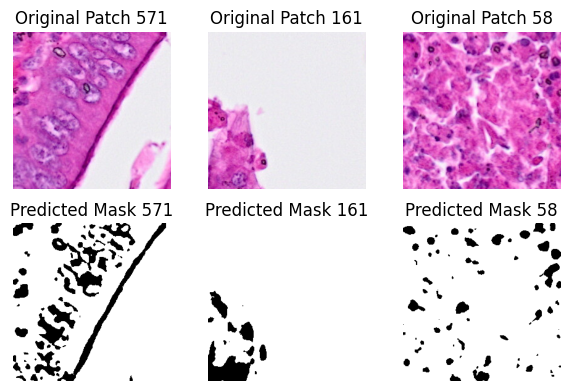

576


576

In [101]:
import matplotlib.pyplot as plt
import random

def plot_patches_vs_masks(patches, predicted_masks, indices):
    n = len(indices)
    fig, axes = plt.subplots(2, n, figsize=(2 * n, 4))
    
    for i, idx in enumerate(indices):
        original_patch = patches[idx][0]
        predicted_mask_patch = predicted_masks[idx][0]
        
        ax_original = axes[0, i]
        ax_mask = axes[1, i]
        
        ax_original.imshow(original_patch)
        ax_original.set_title(f'Original Patch {idx}')
        ax_original.axis('off')
        
        ax_mask.imshow(predicted_mask_patch.squeeze(), cmap='gray')
        ax_mask.set_title(f'Predicted Mask {idx}')
        ax_mask.axis('off')

    plt.tight_layout()
    plt.show()

# Assuming patches and predictions_thresholded are defined elsewhere
# and have the same length
random_indices = random.sample(range(len(patches)), 3)
plot_patches_vs_masks(patches, predictions_thresholded, random_indices)
print(len(patches))
len(predictions_thresholded)


In [49]:
import numpy as np

def stitch_patches(patches, image_shape, patch_size=(256, 256), overlap=0.5):
    stride = int(patch_size[0] * (1 - overlap))
    reconstructed_image = np.zeros(image_shape, dtype=patches[0][0].dtype)
    weight_matrix = np.zeros(image_shape)

    for patch, (x, y) in patches:
        reconstructed_image[y:y + patch_size[0], x:x + patch_size[1]] += patch
        weight_matrix[y:y + patch_size[0], x:x + patch_size[1]] += 1
    
    # Normalize the reconstructed image by the weight matrix
    normalized_image = reconstructed_image / np.maximum(weight_matrix, 1)  # Avoid division by zero

    return normalized_image

# Example usage:
# Assuming `image` is the original image array and `patches` is the list of patches with their positions
# patches = extract_patches(image, patch_size=(256, 256), overlap=0.5)
reconstructed_image = stitch_patches(patches, large_image.shape, patch_size=(256, 256), overlap=0.5)


In [54]:
def stitch_patches(patches, image_shape, patch_size=(256, 256), overlap=0.5):
    stride = int(patch_size[0] * (1 - overlap))
    reconstructed_image = np.zeros(image_shape[:2], dtype=patches[0][0].dtype)
    weight_matrix = np.zeros(image_shape[:2])

    for patch, (x, y) in patches:
        patch = patch.squeeze()
        reconstructed_image[y:y + patch_size[0], x:x + patch_size[1]] += patch
        weight_matrix[y:y + patch_size[0], x:x + patch_size[1]] += 1
    
    normalized_image = reconstructed_image / np.maximum(weight_matrix, 1)  # Avoid division by zero

    return normalized_image
reconstructed_mask = stitch_patches(predictions_thresholded, large_image.shape, patch_size=patch_size, overlap=overlap)


In [55]:
def plot_patch_vs_mask(original_patch, predicted_mask_patch):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original_patch)
    axes[0].set_title('Original Patch')
    axes[0].axis('off')

    axes[1].imshow(predicted_mask_patch, cmap='gray')
    axes[1].set_title('Predicted Mask')
    axes[1].axis('off')

    plt.show()

In [94]:
def stitch_patches2(patches, image_shape, patch_size=(256, 256), overlap=0.5):
    stride = int(patch_size[0] * (1 - overlap))
    reconstructed_image = np.zeros(image_shape[:2], dtype=patches[0][0].dtype)
    weight_matrix = np.zeros(image_shape[:2])

    for patch, (x, y) in patches:
        patch = patch.squeeze()
        reconstructed_image[y:y + patch_size[0], x:x + patch_size[1]] += patch
        weight_matrix[y:y + patch_size[0], x:x + patch_size[1]] += 1
    
    normalized_image = reconstructed_image / np.maximum(weight_matrix, 1)  # Avoid division by zero

    return normalized_image


In [90]:
def plot_images(original_image, reconstructed_mask, title1='Original Image', title2='Reconstructed Image', title3='Reconstructed Mask'):
    # Create a figure with three subplots
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Plot the original image
    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title(title1)
    axes[0].axis('off')

    # Plot the reconstructed mask
    axes[1].imshow(reconstructed_mask, cmap='gray')
    axes[1].set_title(title3)
    axes[1].axis('off')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

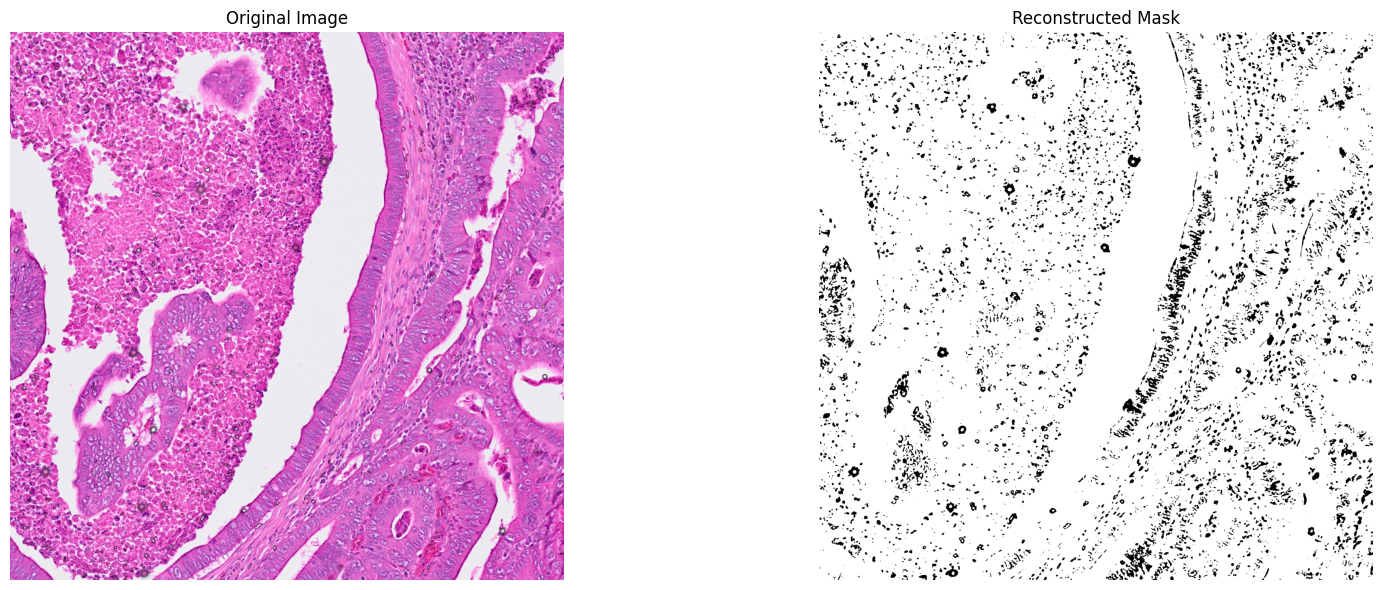

In [117]:
plot_images(large_image, reconstructed_mask, title1='Original Image', title3='Reconstructed Mask')


In [15]:
np.save('reconstructed_mask.npy', reconstructed_mask)

In [114]:
import numpy as np
reconstructed_mask = np.load('../data/processed/reconstructed_mask.npy')

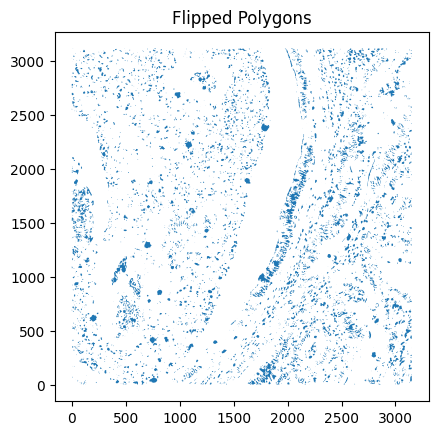

                                               geometry
0     POLYGON ((7.500 3116.000, 7.500 3115.000, 8.00...
1     POLYGON ((486.500 3116.000, 486.500 3115.000, ...
2     POLYGON ((764.500 3116.000, 764.500 3115.000, ...
3     POLYGON ((1221.500 3116.000, 1222.000 3115.500...
4     POLYGON ((1301.500 3116.000, 1301.000 3115.500...
...                                                 ...
6204  POLYGON ((1734.500 4.000, 1734.000 4.500, 1733...
6205  POLYGON ((72.500 3.000, 72.000 3.500, 71.500 3...
6206  POLYGON ((1746.500 1.000, 1747.000 1.500, 1747...
6207  POLYGON ((2851.500 1.000, 2851.500 2.000, 2852...
6208  POLYGON ((2205.500 1.000, 2205.500 2.000, 2205...

[6209 rows x 1 columns]


In [153]:
import numpy as np
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
from skimage import measure


# Find contours at a constant value of 0.5
contours = measure.find_contours(reconstructed_mask, 0.5)

# Define a function to flip the coordinates
def flip_coordinates(contour):
    return np.array([[point[1], reconstructed_mask.shape[0] - point[0]] for point in contour])

# Convert contours to shapely Polygon objects with flipped coordinates
shapely_polygons = [Polygon(flip_coordinates(contour)) for contour in contours if len(contour) > 2]  # Ensure the polygon has at least 3 points

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=shapely_polygons)

# Save to a GeoJSON file
gdf.to_file('polygons.geojson', driver='GeoJSON')

# To load it back
loaded_gdf = gpd.read_file('polygons.geojson')
loaded_gdf.crs = None

# Plot the GeoDataFrame
loaded_gdf.plot()
plt.title('Flipped Polygons')
plt.show()

print(loaded_gdf)


In [154]:
geojson_file = '../data/processed/dataframe_ground_truth.geojson'

# Read GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(geojson_file)
gdf.crs=None

geometry = gdf[gdf['path_class'] == 'roi_cropped']['geometry'].iloc[0]

# Access exterior coordinates of the polygon
coordinates = geometry.exterior.coords.xy

# Assign coordinates to variables
first_barcode_pxl_row = int(min((coordinates[1])))  # Y-coordinate of the first point
first_barcode_pxl_col = int(min(coordinates[0]))# X-coordinate of the first point
last_barcode_pxl_row = int(max(coordinates[1]))  # Y-coordinate of the last point
last_barcode_pxl_col = int(max(coordinates[0]))  # X-coordinate of the last point

In [155]:
def adjust_polygon(polygon, x_offset, y_offset):
    new_coords = [(float(x + x_offset), float(y +
                                               y_offset)) for x, y in polygon.exterior.coords]
    return Polygon(new_coords)
loaded_gdf.loc[:, 'geometry'] = loaded_gdf['geometry'].apply(lambda poly: adjust_polygon(poly, first_barcode_pxl_col, first_barcode_pxl_row))

In [156]:
gdf_filtered = loaded_gdf[loaded_gdf['geometry'].apply(lambda poly: poly.intersects(adjusted_polygon))]

In [158]:
gdf_filtered.to_file('unet_polygon.geojson', driver='GeoJSON')

In [159]:
gdf_filtered = gpd.read_file('../data/processed/unet_polygon.geojson')
gdf_filtered.crs = None

In [184]:
geometry = gdf1['geometry'].iloc[0]

# Access exterior coordinates of the polygon
coordinates = geometry.exterior.coords.xy

# Assign coordinates to variables
first_barcode_pxl_row = int(min((coordinates[1])))  # Y-coordinate of the first point
first_barcode_pxl_col = int(min(coordinates[0]))# X-coordinate of the first point
last_barcode_pxl_row = int(max(coordinates[1]))  # Y-coordinate of the last point
last_barcode_pxl_col = int(max(coordinates[0]))  # X-coordinate of the last point

print(first_barcode_pxl_row, first_barcode_pxl_col,last_barcode_pxl_row,last_barcode_pxl_col)

0 2514 19 2536


In [182]:
def adjust_polygon(polygon, x_offset, y_offset):
    new_coords = [(float(x - 0), float(y - y_offset)) for x, y in polygon.exterior.coords]
    return Polygon(new_coords)

# Adjusting the coordinates in the filtered GeoDataFrame using .loc to avoid SettingWithCopyWarning
gdf2.loc[:, 'geometry'] = gdf2['geometry'].apply(lambda poly: adjust_polygon(poly, first_barcode_pxl_col, first_barcode_pxl_row))


/var/folders/fd/jw2fvp1178s0spb_1sy9f51h0000gn/T/ipykernel_57432/2888676690.py:5: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  overlap_gdf_stardist.boundary.plot(ax=ax, color='green', alpha= 0.5, label='Overlap')


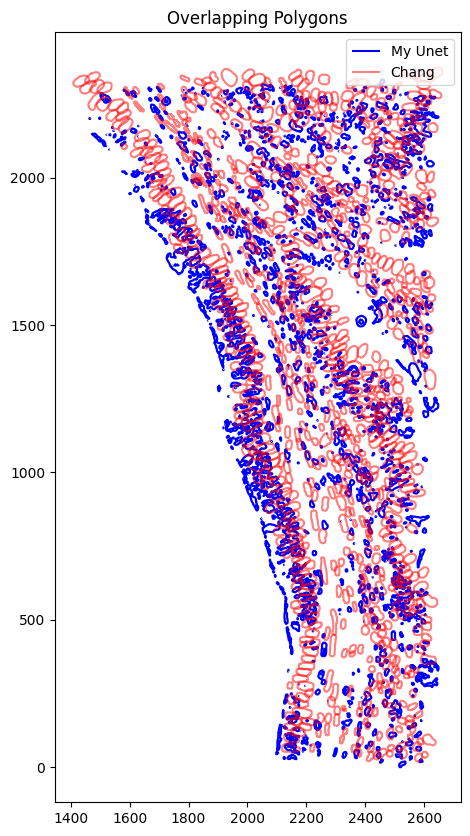

In [183]:
# Optionally, plot the overlapping polygons
fig, ax = plt.subplots(figsize=(10, 10))
gdf1.boundary.plot(ax=ax, color='blue', label='My Unet')
gdf2.boundary.plot(ax=ax, color='red', alpha= 0.5,label='Chang')
overlap_gdf_stardist.boundary.plot(ax=ax, color='green', alpha= 0.5, label='Overlap')
ax.set_title('Overlapping Polygons')
ax.legend()
plt.show()

In [172]:
import geopandas as gpd
from shapely import wkt

# Function to calculate IoU
def iou(poly1, poly2):
    intersection_area = poly1.intersection(poly2).area
    union_area = poly1.union(poly2).area
    return intersection_area / union_area

# Function to calculate metrics
def calculate_metrics(predicted_gdf, ground_truth_gdf, iou_threshold=0.5):
    # Ensure geometries are Shapely objects
    if isinstance(predicted_gdf.geometry.iloc[0], str):
        predicted_gdf['geometry'] = predicted_gdf['geometry'].apply(wkt.loads)
    if isinstance(ground_truth_gdf.geometry.iloc[0], str):
        ground_truth_gdf['geometry'] = ground_truth_gdf['geometry'].apply(wkt.loads)
    
    predicted_gdf = gpd.GeoDataFrame(predicted_gdf, geometry='geometry')
    ground_truth_gdf = gpd.GeoDataFrame(ground_truth_gdf, geometry='geometry')
    
    matches = []
    for idx1, poly1 in enumerate(predicted_gdf.geometry):
        for idx2, poly2 in enumerate(ground_truth_gdf.geometry):
            if iou(poly1, poly2) > iou_threshold:
                matches.append((idx1, idx2))

    tp = len(matches)
    fp = len(predicted_gdf) - tp
    fn = len(ground_truth_gdf) - tp
    fdr = fp / (tp + fp) if (tp + fp) > 0 else 0
    sum_iou = sum([iou(predicted_gdf.geometry[m[0]], ground_truth_gdf.geometry[m[1]]) for m in matches])
    pq = sum_iou / (tp + 0.5 * fp + 0.5 * fn) if (tp + 0.5 * fp + 0.5 * fn) > 0 else 0

    return {
        'True Positives': tp,
        'False Positives': fp,
        'False Negatives': fn,
        'False Discovery Rate': fdr,
        'Panoptic Quality': pq
    }


metrics = calculate_metrics(gdf1, gdf2)
print(metrics)


{'True Positives': 5, 'False Positives': 1460, 'False Negatives': 927, 'False Discovery Rate': 0.9965870307167235, 'Panoptic Quality': 0.0023482902432333625}
